In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
train = pd.read_csv('train.csv')

In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
 sns.set_style('whitegrid')

### Step 2

<AxesSubplot:xlabel='Survived', ylabel='count'>

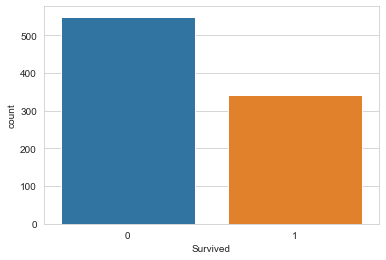

In [12]:
sns.countplot(x='Survived', data=train)

### Step 3

In [13]:
first_surv = train.loc[(train['Survived']==1) & (train['Pclass'] == 1)]
first = train.loc[(train['Pclass'] == 1)]
first_surv_frac = first_surv['Survived'].count() / first['Pclass'].count()
first_surv_frac

0.6296296296296297

<AxesSubplot:xlabel='Survived', ylabel='count'>

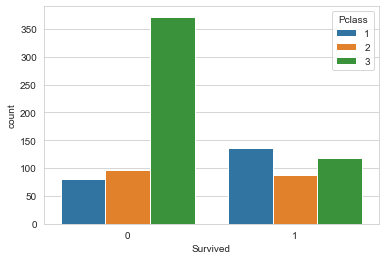

In [14]:
sns.countplot(x='Survived', data=train,hue='Pclass')

### Step 4

<AxesSubplot:xlabel='Sex', ylabel='count'>

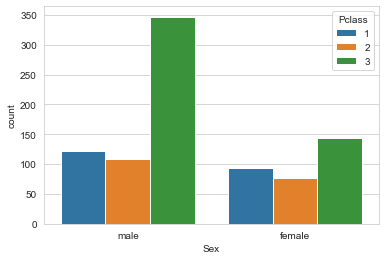

In [15]:
sns.countplot(x='Sex',data=train,hue='Pclass')

### Step 5

<AxesSubplot:xlabel='Age', ylabel='Count'>

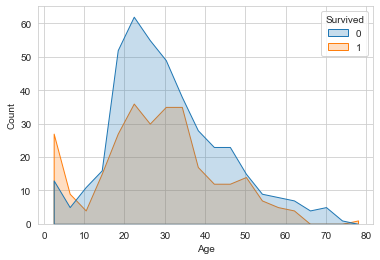

In [16]:
sns.histplot(train, x='Age',kde=False, hue='Survived', element='poly')

### Step 6

In [17]:
print("The average age of the survived passangers is :", round((train[train["Survived"]==1]['Age'].mean()),2) )
print("The average age of the dead passangers is :", round((train[train["Survived"]==0]['Age'].mean()),2) )

The average age of the survived passangers is : 28.34
The average age of the dead passangers is : 30.63


### Step 7

In [19]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Judging from the box plot above, it looks like the average age of 1st class passengers is 37, of the 2nd class 29 and of the 3rd 24.

In [20]:
def fillna_age(cols):
    p_age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(p_age):
        
        if p_class == 1:
            return 38
        elif p_class == 2:
            return 30
        else:
            return 25
    else:
        return p_age

In [21]:
train['Age'] = train[['Age','Pclass']].apply(fillna_age,axis=1)

<AxesSubplot:>

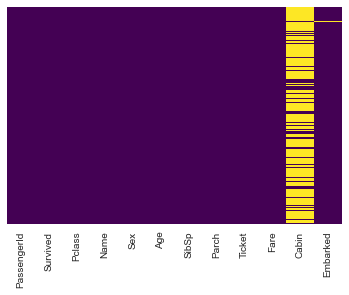

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
train.drop('Cabin',axis=1,inplace=True)

In [24]:
train.dropna(inplace=True)

<AxesSubplot:>

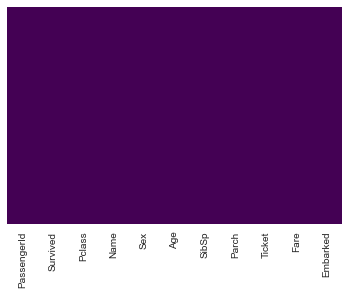

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Step 8

<AxesSubplot:xlabel='Sex,Pclass'>

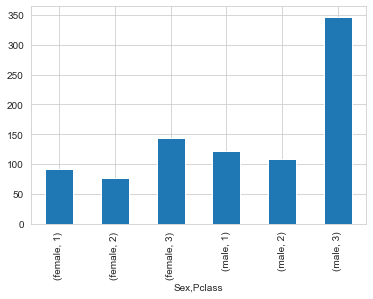

In [26]:
train.groupby(['Sex', 'Pclass'])['Survived'].count().plot.bar()